# Creating maps with Cartopy

This notebook demonstrates how to display gridded and point data on a map.
Examples are given for several of the most commonly used map projections.
* `EqualEarth`: best global maps 
* `AlbersEqualArea` or `LambertConformal`: best for regional maps in the mid-latitudes
* `TransverseMercator`: best for maps of regions that are tall and narrow
* `NorthPolarStereographic` or `SouthPolarStereographic`: best for polar regions


### 1. Import packages

In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from acgc import figstyle

### 2. Read or create data for visualization

In this example, we create two artificial datasets. One is a global gridded array of sinusoidal variations. The other is a random collection of points over the United States. 

In [55]:
# Create artificial gridded data

import numpy as np

# Number of points in x and y directions
n = 20

pi180 = np.pi/180

# Edges of the latitude-longitude grid
latedge  = np.linspace(-90,90,n+1)
lonedge  = np.linspace(-180,180,2*n+1)
lon2de, lat2de = np.meshgrid( lonedge, latedge )

# Centers of the latitude-longitude grid
lat      = np.convolve(latedge, [0.5,0.5], 'valid' )
lon      = np.convolve(lonedge, [0.5,0.5], 'valid' )
lon2d, lat2d = np.meshgrid( lon, lat )

# Artificial data
data = np.cos( 3*lat2d*pi180 ) * np.cos( 2*lon2d*pi180 )

In [3]:
# Create artificial point data

# number of points
npoint = 50

# random latitude longitude and value
plat  = np.random.rand(npoint) * 25 + 25
plon  = np.random.rand(npoint) * 50 - 120
pdata = np.random.rand(npoint)

### 3. Define coordinate system of the data

The artificial data have latitude and longitude for coordinates. In Cartopy, this is the `PlateCarree` coordinate system.

In [4]:
# Define data coordinate system
# Use PlateCarree for latitude-longitude coordinates
datacoord = ccrs.PlateCarree()

### 4. Global maps

The `EqualEarth` projection is a good choice for global maps because the sizes of all features of the map are proportional to their true area on Earth. It also does a reasonable job at preserving shapes of features. 

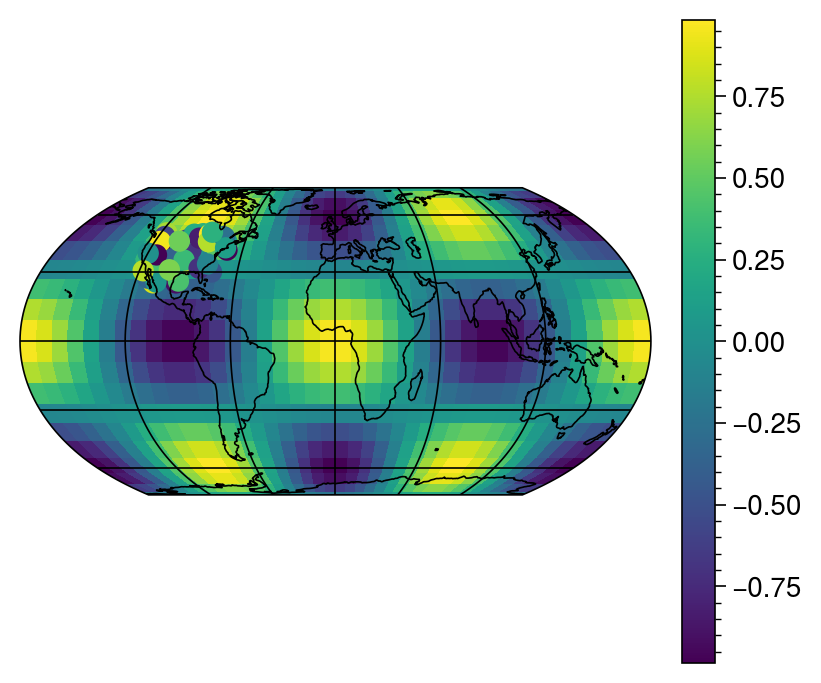

In [62]:
# Global map, Equal Earth Projection
fig, ax = plt.subplots( subplot_kw={'projection':ccrs.EqualEarth()} )

# Add gridded data
m = ax.pcolormesh(lonedge, latedge, data, transform=datacoord)

# Add point data
p = ax.scatter(plon, plat, marker='o', c=pdata, s=50, transform=datacoord)

# Add coasts; Use ‘110m’ or ‘50m’ resolution
ax.coastlines(resolution='110m')

# draw parallels and meridians, but don't label them.
ax.gridlines(draw_labels=False)

# Add a colorbar
fig.colorbar(m)

### 4b Transforming the data coordinates

The latitude and longitude coordinates can be projected into the map projection coordinates. 

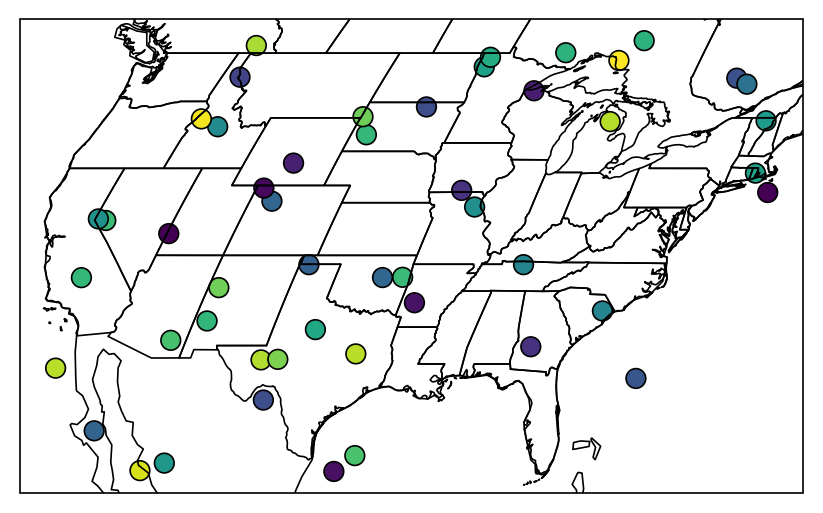

In [60]:
# Map projection
projcoord=ccrs.EqualEarth()
ax = plt.axes( projection=projcoord )

# Convert the points into the projection coordinate system
xyz = projcoord.transform_points( datacoord, plon, plat )

# Plot the points using *projection* coordinates
# Note: Now we don't need "transform"
x=xyz[:,0]; y=xyz[:,1]
plt.scatter( x, y, c=pdata, s=50, marker='o', edgecolor='black' )

# Add coasts; Use ‘110m’ or ‘50m’ resolution
ax.coastlines(resolution='110m')

# Add state borders
ax.add_feature(cfeature.STATES.with_scale('50m'))

### 5. Contiguous United States (CONUS) maps

The `AlbersEqualArea` and `LambertConformal` projections are commonly used for CONUS and other large regional areas in the mid-latitudes. 

The values of `central_longitude`, `central_latitude`, and `standard_parallels` in the example below match the values commonly used by USGS and NOAA for CONUS maps. Their values can be changed for mapping other regions.

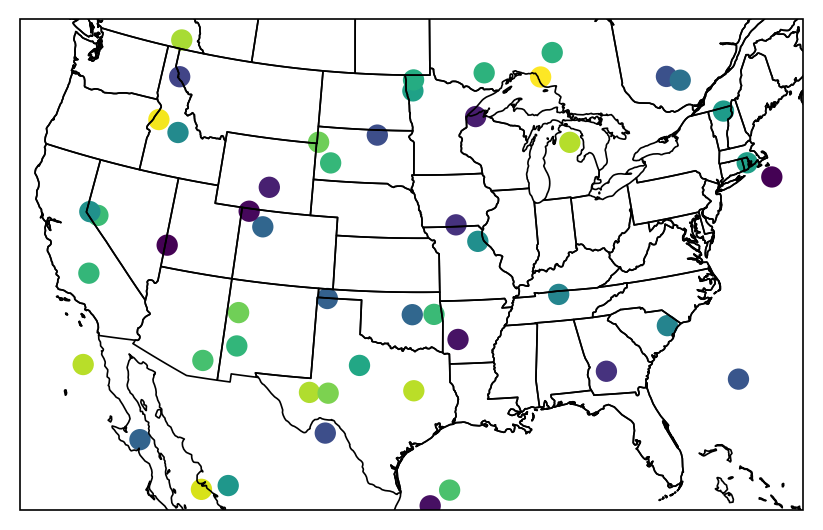

In [41]:
# Map projection for CONUS
ax = plt.axes( projection=ccrs.AlbersEqualArea(central_longitude=-96,
                                               central_latitude=37.5, 
                                               standard_parallels=(29.5,45.5) ))
# ax = plt.axes( projection=ccrs.LambertConformal(central_longitude=-96,
#                                                 central_latitude=39,
#                                                 standard_parallels=(33,45)))

# Set lat-lon of map edges. These are reasonable for CONUS
ax.set_extent([-120, -73, 25, 50], ccrs.PlateCarree())

# Add point data
p = ax.scatter(plon, plat, marker='o', c=pdata, s=50, transform=datacoord)

# Add coasts; Use ‘50m’ resolution for maps of US or smaller
ax.coastlines(resolution='50m')

# Add state borders
ax.add_feature(cfeature.STATES.with_scale('50m'))

# Add a colorbar
plt.colorbar(p)


### 6. Vertically oriented regions

The `TransverseMercator` projection is a good choice for mapping narrow regions at any latitude that have a larger north-south extent than east-west extent. `UTM` is a special case of `TransverseMercator`.

`central_longitude` should be set to the center of the region being mapped.

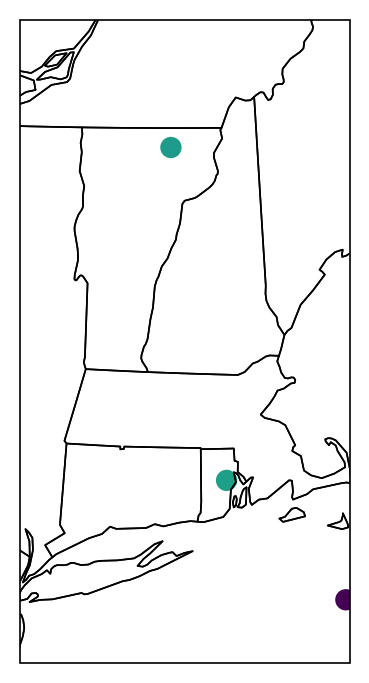

In [54]:
# Map projection for a vertically oriented region
ax = plt.axes( projection=ccrs.TransverseMercator(central_longitude=-72) )

# Set lat-lon of map edges.
ax.set_extent([-74, -70, 40, 46], ccrs.PlateCarree())

# Add point data
p = ax.scatter(plon, plat, marker='o', c=pdata, s=50, transform=datacoord)

# Add coasts; Use ‘50m’ resolution for maps of US or smaller
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.STATES.with_scale('50m'))


### 7. Polar maps

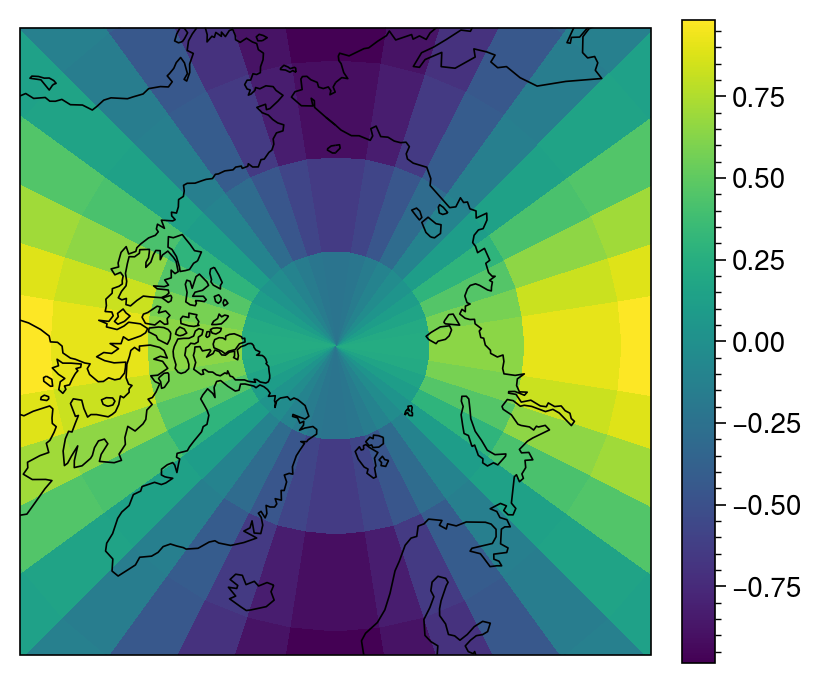

In [57]:
# Map projection for North Pole
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())

# Add gridded data
m = ax.pcolormesh(lonedge, latedge, data, transform=datacoord)

# Add coasts; Use ‘110m’ or ‘50m’ resolution
ax.coastlines(resolution='110m')

# Add colorbar
plt.colorbar(m)


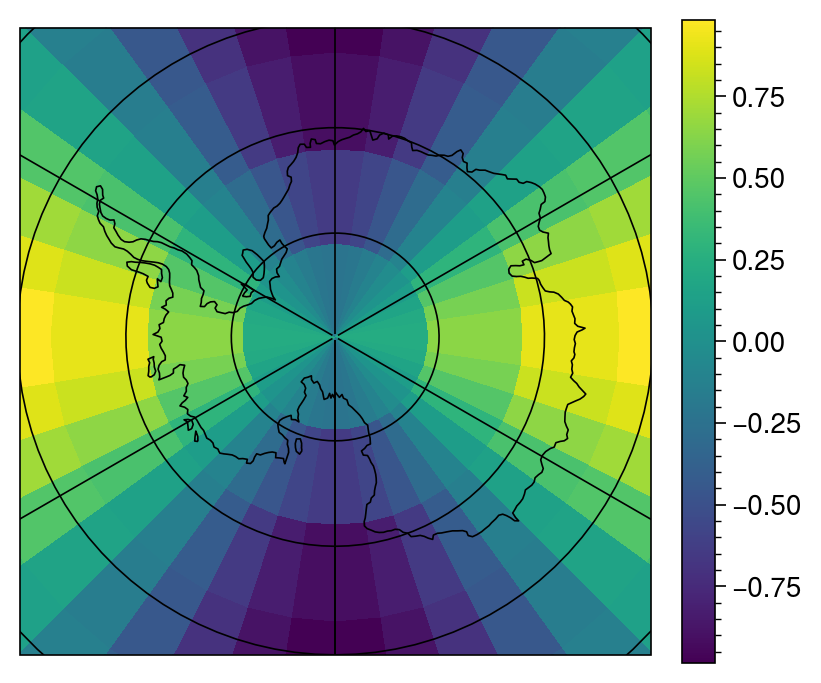

In [61]:
# Map projection for South Pole
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

# Add gridded data
m = ax.pcolormesh(lonedge, latedge, data, transform=datacoord)

# Add coasts; Use ‘110m’ or ‘50m’ resolution
ax.coastlines(resolution='110m')

# Add colorbar
plt.colorbar(m)